In [1]:
import os
from xml.etree import ElementTree
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp

In [53]:
def GetGoal(path):
    lst = []
    dom = ElementTree.parse(path)
    myRoot = dom.getroot()
    i = 0
    while i in range(len(myRoot[0])):
        if int(myRoot[0][i].attrib['team_id']) == 1:
            chance = int(myRoot[0][i].attrib['type_id'])
            if (chance == 16 or chance == 13 or chance == 14 or chance == 82 or chance == 94 or chance == 15):
                sub_list = []
                org_ind = i
                indx = i
                #print(myRoot[0][indx].attrib['type_id'])
                #print(myRoot[0][indx].attrib['team_id'])
                while int(myRoot[0][indx].attrib['team_id']) == 1:
                    chance_dict = {}
                    chance_dict['player_id'] = myRoot[0][indx].attrib['player_id']
                    chance_dict['type_id'] = float(myRoot[0][indx].attrib['type_id'])
                    chance_dict['X'] = float(myRoot[0][indx].attrib['x'])
                    chance_dict['Y'] = float(myRoot[0][indx].attrib['y'])
                    time = ((myRoot[0][indx].attrib['timestamp']).split("T")[1]).split(":")
                    chance_dict['timestamp'] = float(''.join(time))
                    #print(chance_dict)
                    sub_list.append(chance_dict)
                    indx = indx - 1
                    
                sub_list.sort(key=lambda a: a['timestamp'])
                lst.append(sub_list)
                i = org_ind
            else:
                pass            
        else:
            pass
        
        i += 1
    
    return lst

In [55]:
def GetPlayers(path):
    dom = ElementTree.parse(path)
    myRoot = dom.getroot()
    #lst = []
    dict_ = {}
    for x in myRoot[0]:
        
        try:
            if x.attrib['uID'] == 't1':
                children = x.getchildren()
                
                for child in children:
                    #dict = {}
                    #try:
                        #print(child.attrib['uID'][1:])
                        #dict['player_id'] = child.attrib['uID'][1:]
                    #except:
                        #pass
                    ch = child.getchildren()
                    for c in ch:
                        #print(c.getchildren()[0].text)
                        try:
                            dict_[child.attrib['uID'][1:]] = c.getchildren()[0].text + ' ' + c.getchildren()[1].text
                        except:
                            pass
                        #lst.append(dict)
                        
        except:
            pass
        
    return dict_

In [6]:
full_file_poss1 = "C:/Users/ssoun/Desktop/StatsPerform/ManUtdvBurnley.xml"
full_file_player1 = "C:/Users/ssoun/Desktop/StatsPerform/ManUtdvBurnley_player.xml"

In [59]:
chances = GetGoal(full_file_poss1)

In [56]:
players = GetPlayers(full_file_player1)
print(players)

{'51940': 'David De Gea', '184667': 'Victor Lindelöf', '106760': 'Luke Shaw', '20695': 'Luis Antonio Antonio Valencia', '55909': 'Chris Smalling', '41184': 'Marouane Fellaini', '74208': 'Paul Pogba', '62398': 'Nemanja Matic', '109322': 'Jesse Lingard', '66749': 'Romelu Lukaku', '37265': 'Alexis Sánchez', '197365': 'Eric Bailly', '176297': 'Marcus Rashford', '6744': 'Lee Grant', '101582': 'Frederico Fred', '59846': 'Ander Herrera', '18892': 'Ashley Young', '148225': 'Anthony Martial', 'an134': 'José Mourinho'}


c:\users\ssoun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  # Remove the CWD from sys.path while we load stuff.
c:\users\ssoun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
c:\users\ssoun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


In [58]:
for ch in chances:
    for c in ch:
        c['Name'] = players[c['player_id']]
print(chances)

[[{'player_id': '51940', 'type_id': 52.0, 'X': 1.4, 'Y': 72.1, 'timestamp': 160157.213, 'Name': 'David De Gea'}, {'player_id': '51940', 'type_id': 1.0, 'X': 8.5, 'Y': 67.3, 'timestamp': 160201.974, 'Name': 'David De Gea'}, {'player_id': '55909', 'type_id': 1.0, 'X': 25.1, 'Y': 39.2, 'timestamp': 160204.814, 'Name': 'Chris Smalling'}, {'player_id': '184667', 'type_id': 1.0, 'X': 27.6, 'Y': 68.8, 'timestamp': 160209.822, 'Name': 'Victor Lindelöf'}, {'player_id': '55909', 'type_id': 1.0, 'X': 26.1, 'Y': 46.6, 'timestamp': 160211.774, 'Name': 'Chris Smalling'}, {'player_id': '41184', 'type_id': 1.0, 'X': 29.3, 'Y': 21.3, 'timestamp': 160213.83, 'Name': 'Marouane Fellaini'}, {'player_id': '74208', 'type_id': 1.0, 'X': 36.5, 'Y': 34.3, 'timestamp': 160215.358, 'Name': 'Paul Pogba'}, {'player_id': '41184', 'type_id': 1.0, 'X': 33.3, 'Y': 37.6, 'timestamp': 160217.646, 'Name': 'Marouane Fellaini'}, {'player_id': '184667', 'type_id': 1.0, 'X': 43.4, 'Y': 82.6, 'timestamp': 160223.55, 'Name': 'V

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

52.0
5.0
5.0
49.0
49.0
3.0
12.0
49.0
5.0
44.0
12.0
49.0
74.0
49.0
10.0
52.0
4.0
44.0


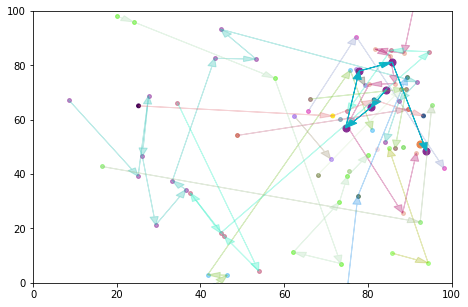

In [127]:
import random

fig=plt.figure()
fig.set_size_inches(7.5, 5)
ax = fig.add_subplot(111)
"""
for ch in chances:
    i = 0
    for i in range(len(ch)-1):
        plt.plot(ch[i]['X'], ch[i]['Y'], 'o')
        plt.arrow(ch[i]['X'], ch[i]['Y'], ch[i+1]['X'], ch[i+1]['Y'])
        i += 1
"""

for ch in chances:
    i = 0
    if ch[-1]['type_id'] == 16.0:
        alp = 1
        size = 50
    else:
        size = 15
        alp = 0.5
    col = (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), alp)
    ptsX = []
    ptsY = []
    for i in range(len(ch)):
        #print(ch[i]['type_id'] != 1.0)
        if ch[i]['type_id'] == 1.0 or ch[i]['type_id'] == 16.0 or ch[i]['type_id'] == 13.0 or ch[i]['type_id'] == 15.0:
            #plt.plot(ch[i]['X'], ch[i]['Y'], s=10) 
            ptsX.append(ch[i]['X'])
            ptsY.append(ch[i]['Y'])
        else:
            print(ch[i]['type_id'])
            #plt.plot(ch[i]['X'], ch[i]['Y'], 'o') 
            #plt.arrow(ch[i]['X'], ch[i]['Y'], ch[i+1]['X'] - ch[i]['X'], ch[i+1]['Y'] - ch[i]['Y'], head_width=2, length_includes_head=True, color=col)
        i += 1
    plt.scatter(ptsX, ptsY, c=col, s=size)

for ch in chances:
    i = 0
    if ch[-1]['type_id'] == 16.0:
        alp = 1
    else:
        alp = 0.3
    col = (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), alp)
    for i in range(len(ch)-1):
        if (ch[i]['type_id'] == 1.0) or (ch[i]['type_id'] == 16.0) or (ch[i]['type_id'] == 13.0) or (ch[i]['type_id'] == 15.0):
            plt.arrow(ch[i]['X'], ch[i]['Y'], ch[i+1]['X'] - ch[i]['X'], ch[i+1]['Y'] - ch[i]['Y'], head_width=2, length_includes_head=True, color=col)
            #print(ch[i+1]['type_id'])
        else:
            #plt.plot(chances[0][i]['X'], chances[0][i]['Y'], 'ro') 
            #plt.arrow(ch[i]['X'], ch[i]['Y'], ch[i+1]['X'] - ch[i]['X'], ch[i+1]['Y'] - ch[i]['Y'], head_width=2, length_includes_head=True, color=col)
            pass
        i += 1

plt.xlim([0,100]), plt.ylim([0,100])
plt.show()